In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from numpy import pi

## Defining the QFT Function 

In [3]:
def qft_rotations(circuit, n):
    if n == 0: # exit function if circuit is empty
        return circuit
    n -= 1 # indexes start from 0
    circuit.h(n) 
    for qubit in range(n):
        # for each less significant qubit
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

    qft_rotations(circuit, n)

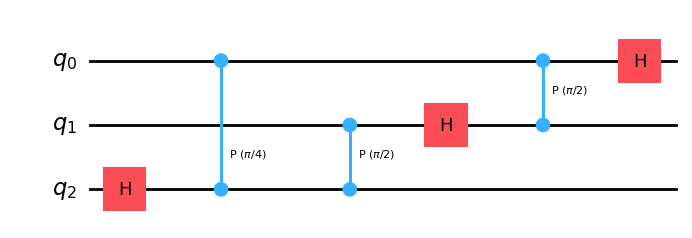

In [4]:
qc = QuantumCircuit(3)
qft_rotations(qc,3)
qc.draw('mpl')

## Function to SWAP Registers after QFT Computation

In [5]:
# function to SWAP the registers 
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

## QFT Function 

In [6]:
# function to apply the QFT to the Quantum Circuit 
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

## QFT|000>

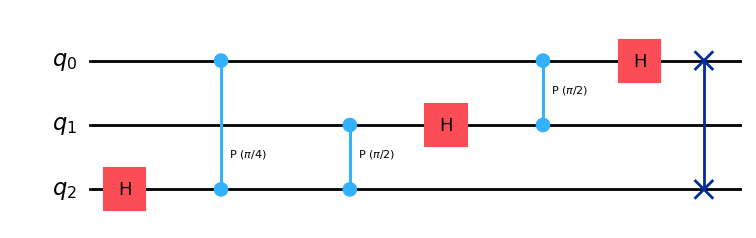

In [7]:
# QFT circuit for a 3 Qubit case at state |000>
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw('mpl')

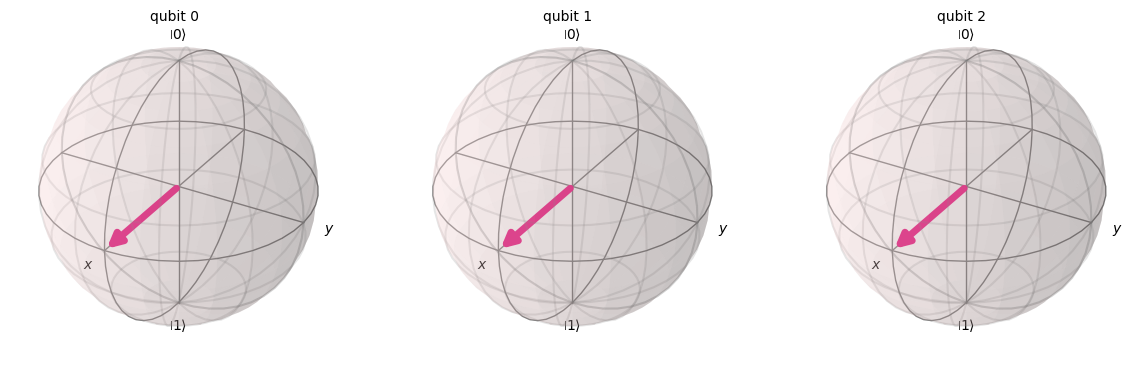

In [36]:
state1 = Statevector(qc)
plot_bloch_multivector(state1)

In [37]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_hinton
from qiskit.visualization import plot_state_paulivec

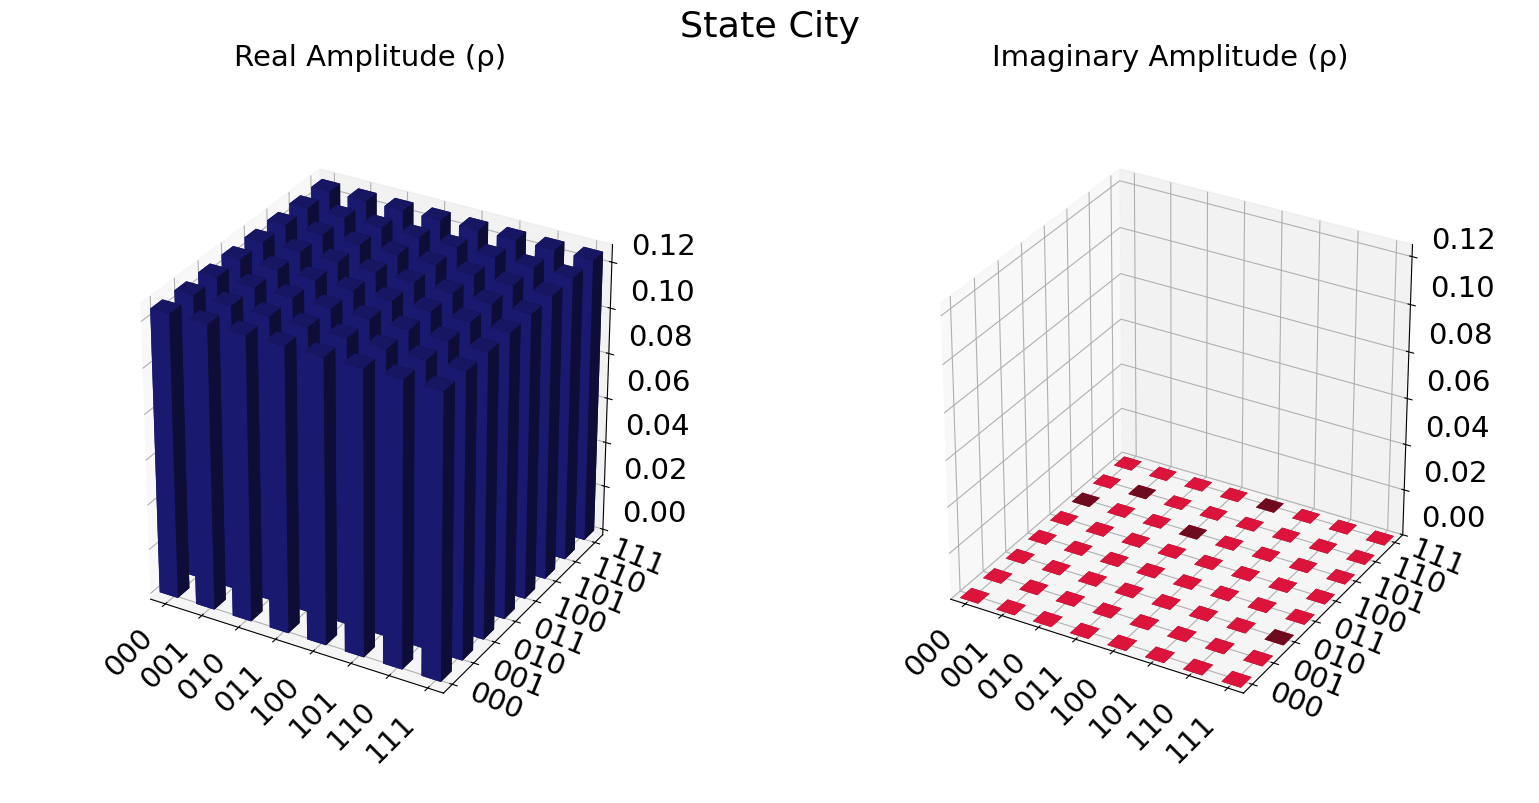

In [38]:
state2 = DensityMatrix(qc)
plot_state_city(state2, color=['midnightblue', 'crimson'], title="State City")

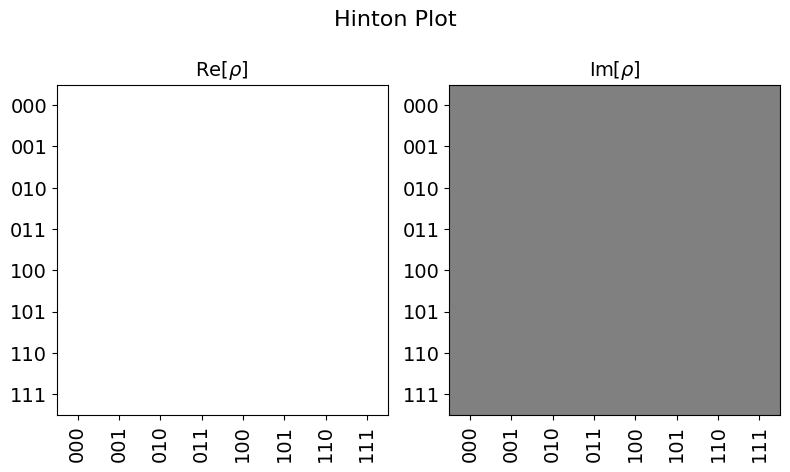

In [39]:
plot_state_hinton(state2, title="Hinton Plot")

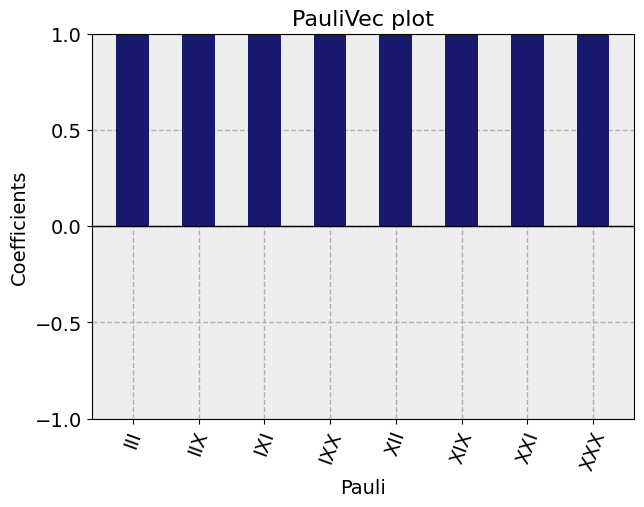

In [40]:
plot_state_paulivec(state1, color='midnightblue', title="PauliVec plot")

In [45]:
print("\nQuantum state is:",state1)


Quantum state is: Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


## QFT|101>

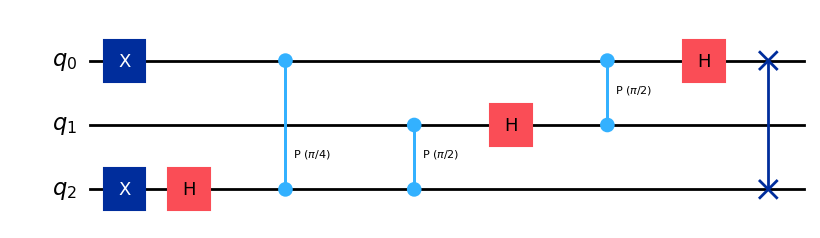

In [46]:
qc = QuantumCircuit(3)
# encode the state 
qc.x(0)
qc.x(2)

# applying the QFT to the circuit with input as |101>
qft(qc,3)
qc.draw('mpl')

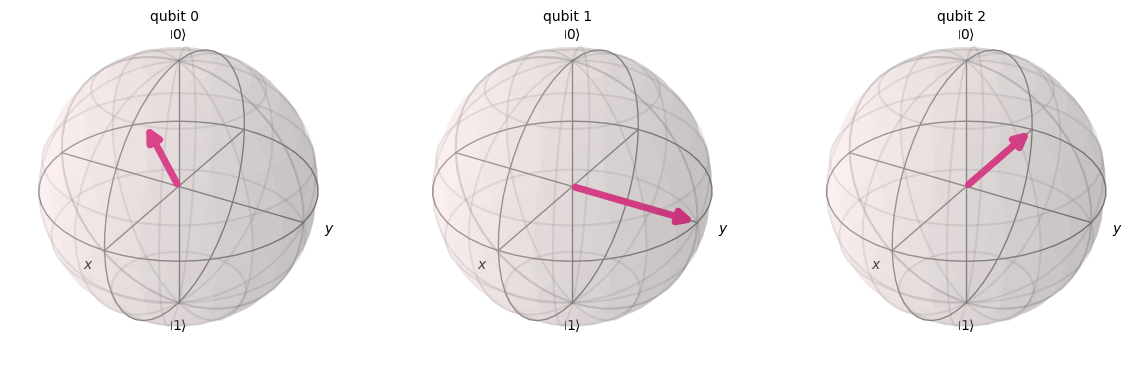

In [47]:
state1 = Statevector(qc)
plot_bloch_multivector(state1)

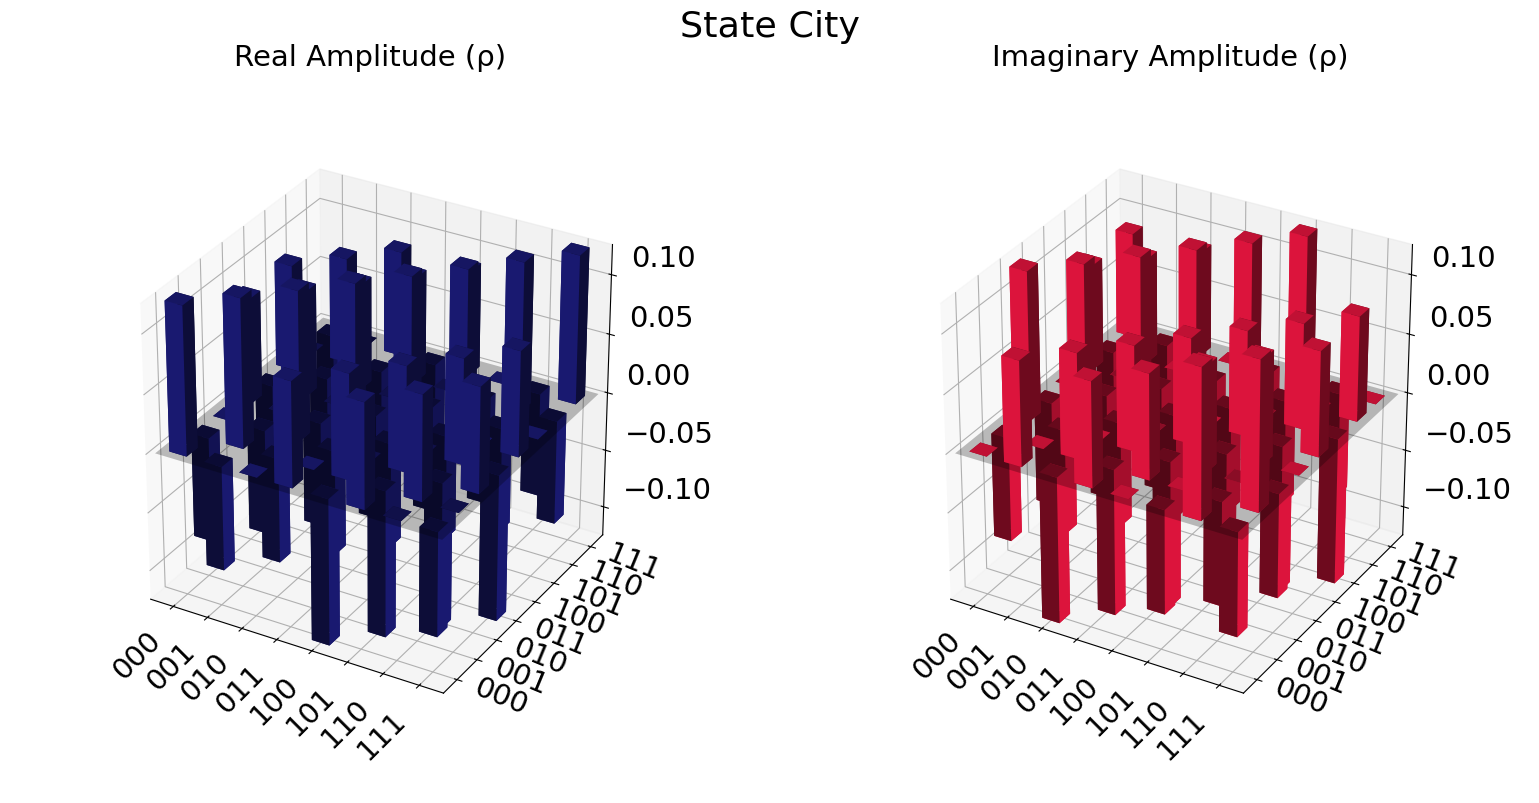

In [48]:
state2 = DensityMatrix(qc)
plot_state_city(state2, color=['midnightblue', 'crimson'], title="State City")

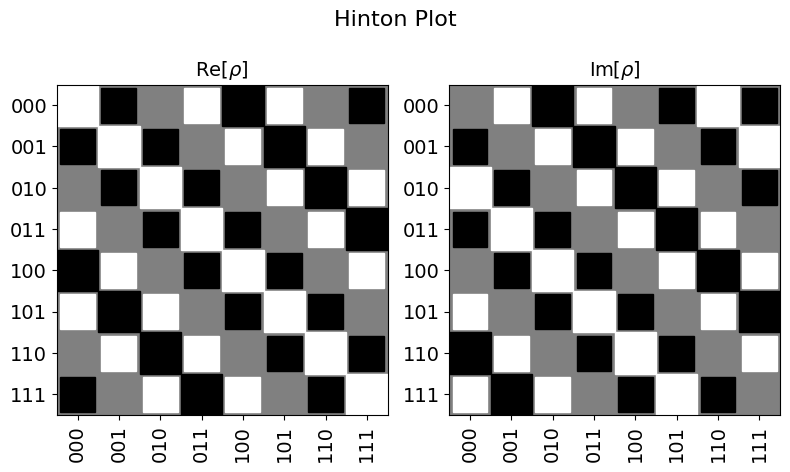

In [49]:
plot_state_hinton(state2, title="Hinton Plot")

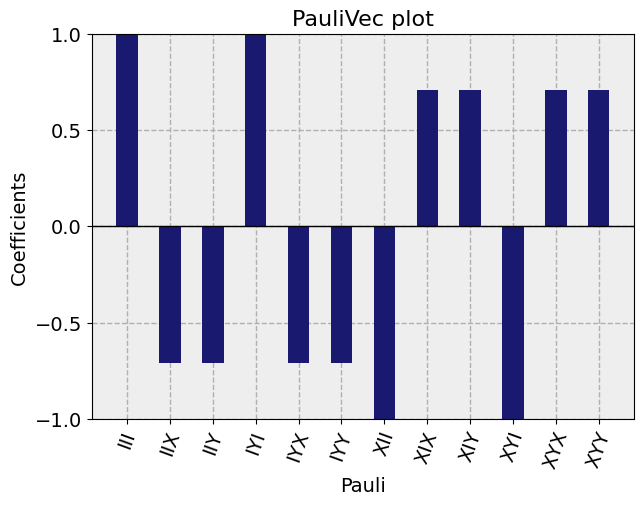

In [50]:
plot_state_paulivec(state1, color='midnightblue', title="PauliVec plot")

In [51]:
print("\nQuantum state is:",state1)


Quantum state is: Statevector([ 3.53553391e-01+0.j        , -2.50000000e-01-0.25j      ,
              2.16489014e-17+0.35355339j,  2.50000000e-01-0.25j      ,
             -3.53553391e-01+0.j        ,  2.50000000e-01+0.25j      ,
             -2.16489014e-17-0.35355339j, -2.50000000e-01+0.25j      ],
            dims=(2, 2, 2))


The Quantum Fourier Transform (QFT) maps computational basis states to superpositions of phase-encoded basis states. For an \( n \)-qubit system, the QFT is defined by its action on computational basis states:

$
QFT |x\rangle = \frac{1}{\sqrt{2^n}} \sum_{y=0}^{2^n - 1} e^{2\pi i xy / 2^n} |y\rangle.
$

### **QFT on $|000\rangle $**
The QFT applied to $ |000\rangle $ results in an equal superposition:

$
QFT |000\rangle = \frac{1}{2^{3/2}} \sum_{y=0}^{7} |y\rangle = |+\rangle|+\rangle|+\rangle,
$

where $ |+\rangle = \frac{1}{\sqrt{2}}  (|0\rangle + |1\rangle) $ is the Hadamard basis state.

### **QFT on $ |101\rangle $**
For a computational basis state $ |x\rangle $, where $ x $ in decimal is 5 $(( 101_2 = 5 ))$, the QFT results in:

$
QFT |101\rangle = \frac{1}{\sqrt{8}} \sum_{y=0}^{7} e^{2\pi i (5y)/8} |y\rangle.
$

In this expression, each basis state $ |y\rangle $ carries a phase factor $ e^{2\pi i 5y/8} $.

### **Phase Analysis Per Qubit**
I compare this state with the QFT of $ |000\rangle $, which is an equal superposition with no phase. The relative phase accumulations per qubit can be determined by decomposing the phase components.

- **Qubit 0:** The least significant qubit accumulates the most phase. The given fraction $ \frac{5}{8} $ suggests that qubit 0 undergoes $ 5/8 $ of a full turn.
- **Qubit 1:** The middle qubit accumulates $ 1/4 $ of a full turn.
- **Qubit 2:** The most significant qubit accumulates $ 1/2 $ of a full turn.

### **Confirmation with QFT Theory**
From QFT theory, the phase accumulation for qubit $ k $ of state $ |x\rangle $ is determined by the binary decomposition of $ x $. Specifically the phase on qubit $ k $ is given by:

$
e^{2\pi i (0.x_k x_{k+1} \dots x_n)}
$

where $ (0.x_k x_{k+1} \dots x_n) )$ represents the fractional binary expansion of $ x/2^n $.

For $( x = 101_2 = 5 )$:

$
\frac{5}{8} = 0.101_2
$

Breaking this down for each qubit:

- Qubit 0 sees $( 0.101_2 = 5/8 )$ of a full turn.
- Qubit 1 sees $( 0.01_2 = 1/4 )$ of a full turn.
- Qubit 2 sees $( 0.1_2 = 1/2 )$ of a full turn.

The analysis confirms that after applying the QFT:

- Qubit 0 accumulates \( 5/8 \) of a full phase turn.
- Qubit 1 accumulates \( 1/4 \) of a full phase turn.
- Qubit 2 accumulates \( 1/2 \) of a full phase turn.

This matches with theoretical expectations from the QFT transformation and the binary fraction expansion of the state \( |101\rangle \).
